## **Challenge: Mitigate Energy Consumption and Climate Change**


Climate chnage is an issue that is heavily impacted by energy ploicy and infrastructure. In general, greenhouse gas (GHG) emissions mitigation needs chnages to electrical systems, transportation, building, industry, and land use.

Here, using our Dataset, we want to understand which variable has the highest effect on the site energy Usage Intensity variable: the amount of heat and electricity consumed by a building as reflected in utility bills.

Please carefully analyze the provide dataset using the following revised set of questions. Your answers will not only help you understand the dataset better but also hone your data analysis skills. After completing your analysis, please push your answers and any addociated code or visualizations to the 'Homework' folder in our Github repository, specifically under 'Week 3'. When naming your homework, please use the following method: 'YourFirstName_HW?'

### **Homework Questions**

#### **1. Data Understanding and Summary:**

- Question: Summarize and describe the data type of each variable.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
df =pd.read_csv("ClimateData.csv")

In [4]:
df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [5]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [6]:
df_shape = df.shape
print(df_shape)

(75757, 9)


In [7]:
df.info

<bound method DataFrame.info of           id building_class  floor_area  year_built  precipitation_inches  \
0          0     Commercial     61242.0      1942.0                 16.59   
1          1     Commercial    274000.0      1955.0                 16.59   
2          2     Commercial    280025.0      1951.0                 16.59   
3          3     Commercial     55325.0      1980.0                 16.59   
4          4     Commercial     66000.0      1985.0                 16.59   
...      ...            ...         ...         ...                   ...   
75752  75752     Commercial     20410.0      1995.0                 45.03   
75753  75753    Residential     40489.0      1910.0                 45.03   
75754  75754     Commercial     28072.0      1917.0                106.32   
75755  75755     Commercial     53575.0      2012.0                106.32   
75756  75756    Residential     23888.0      1974.0                107.69   

       snowfall_inches   avg_temp  days_wit

In [7]:
df.describe

<bound method NDFrame.describe of           id building_class  floor_area  year_built  precipitation_inches  \
0          0     Commercial     61242.0      1942.0                 16.59   
1          1     Commercial    274000.0      1955.0                 16.59   
2          2     Commercial    280025.0      1951.0                 16.59   
3          3     Commercial     55325.0      1980.0                 16.59   
4          4     Commercial     66000.0      1985.0                 16.59   
...      ...            ...         ...         ...                   ...   
75752  75752     Commercial     20410.0      1995.0                 45.03   
75753  75753    Residential     40489.0      1910.0                 45.03   
75754  75754     Commercial     28072.0      1917.0                106.32   
75755  75755     Commercial     53575.0      2012.0                106.32   
75756  75756    Residential     23888.0      1974.0                107.69   

       snowfall_inches   avg_temp  days_w

#### **2. Unique Values Analysis:**

- Question: for the categorical variable in the dataset, identify the number of unique values.

In [8]:
unique_values = df['building_class'].unique()
print(unique_values)

['Commercial' 'Residential']


In [9]:
for col in df.select_dtypes(include = 'object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for building_class:
building_class
Residential    43558
Commercial     32199
Name: count, dtype: int64



In [10]:
data_types=df.dtypes 
print(data_types)

id                        int64
building_class           object
floor_area              float64
year_built              float64
precipitation_inches    float64
snowfall_inches         float64
avg_temp                float64
days_with_fog           float64
site_eui                float64
dtype: object


#### **3. Descriptive Statistics:**

- Qestion: Examine and summarize the descriptive statistics for the dataset. What insights can you gain about the central tendecy and dispersion of each variable?

In [11]:
df.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


I believe the range in some of the columns is a little to big. In some of the columns the mean and range does not make sense. This could be because of misssing data or invalid entries. 

#### **4. Missing Values Assessment:**

- Question: Assess the dataset for missing values. Quantify the extent of missingness in each column. How might these missing values affect your analysis?

In [12]:
missing_data=df.isnull().sum()
print("Missing data:\n", missing_data )

Missing data:
 id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64


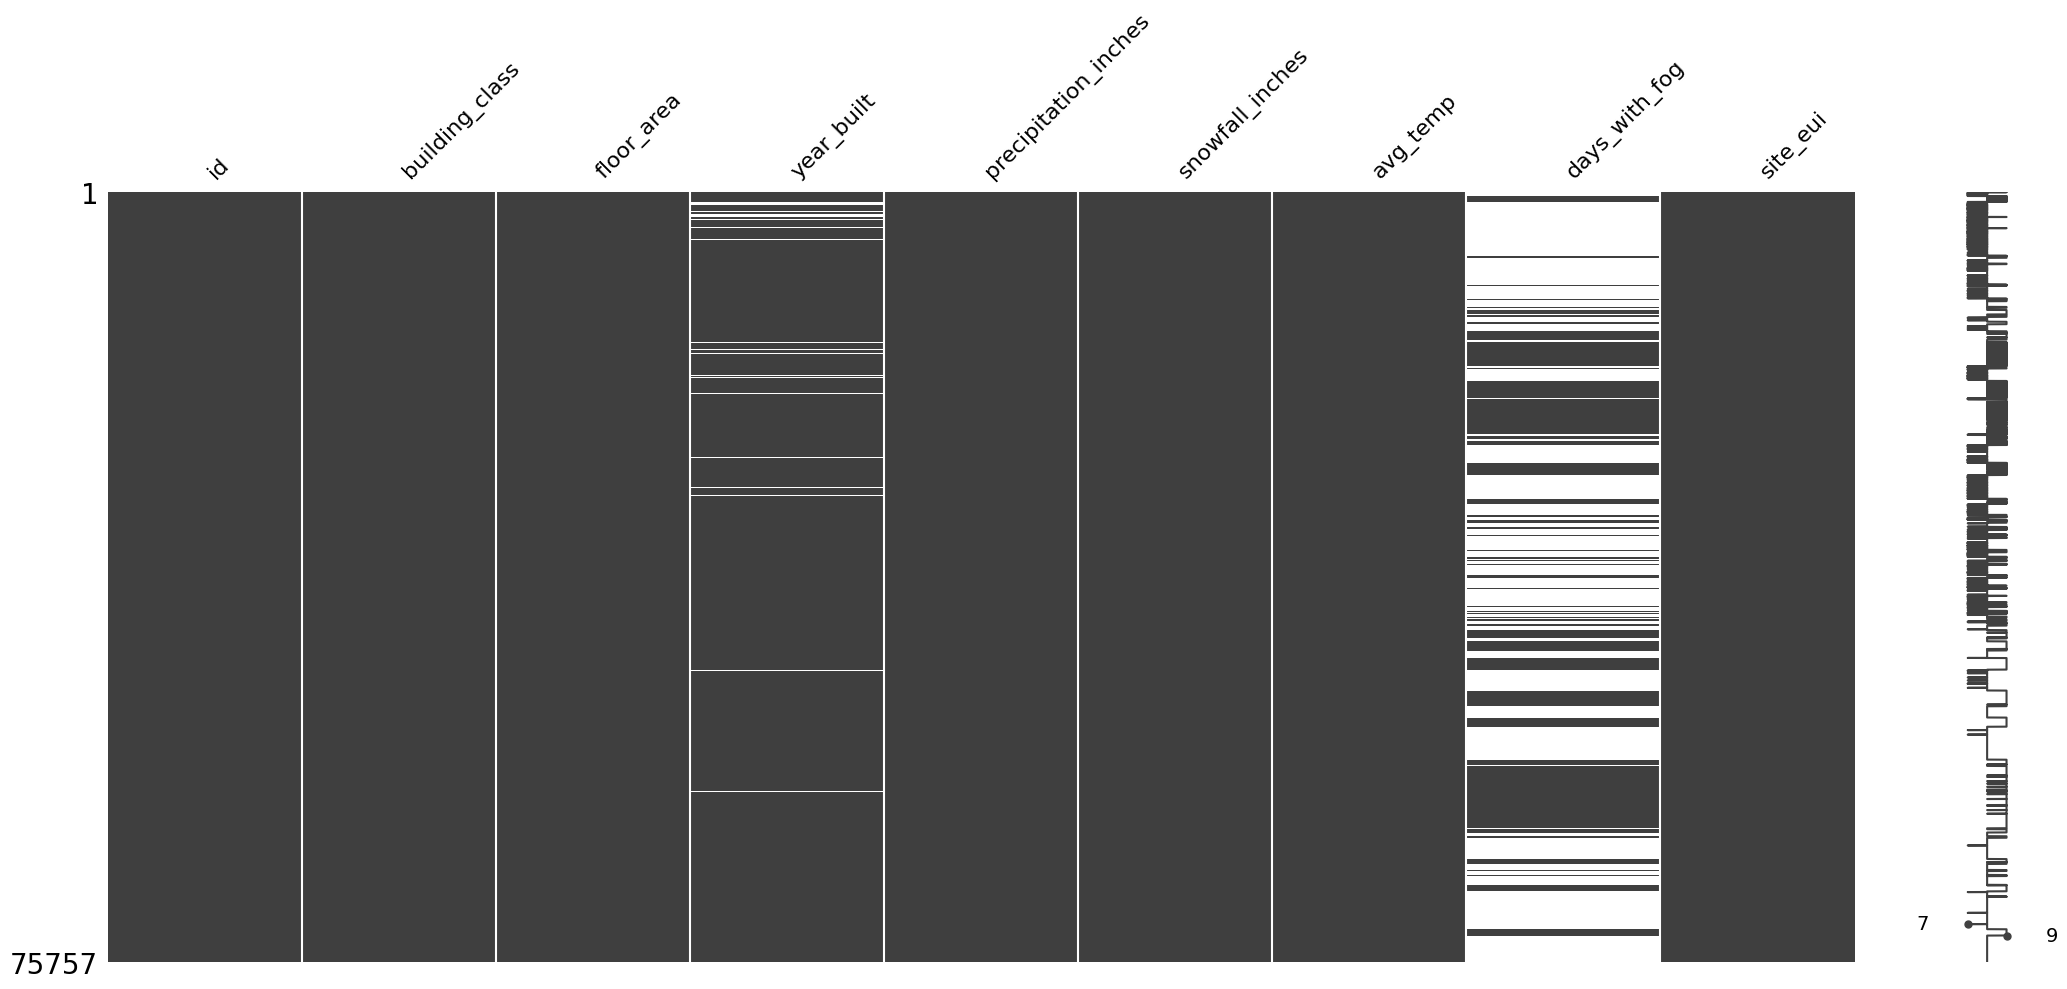

In [14]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

#### **5. Missing Data Handling:**

 - Question: Based on your assessment of missing values, choose appropriate techniques to handle them. Would you opt for imputation or removal? Justify your choice.

The missing data can effect the descriptive summary of a dataset. I think the year built is a every important variable in this dataset so I have to find a way to replace it. However, the I do not think the days with fog matters so I can remove those from the data set.

In [16]:
df.dropna(subset=["days_with_fog"], inplace=True)

In [21]:
df["year_built"].fillna(df["year_built"].median() , inplace=True)

In [22]:
missing_data=df.isnull().sum()
print("Missing data:\n", missing_data )

Missing data:
 id                      0
building_class          0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64


#### **6. Duplicate Records:**

- Question: Identify and quantify and duplicate records in the dataset. What method will you use to eliminate these duplicates, and why?

In [23]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records:",duplicates)

Number of Duplicate Records: 0


In [32]:
print(df.columns)

Index(['building_class', 'floor_area', 'year_built', 'precipitation_inches',
       'snowfall_inches', 'avg_temp', 'days_with_fog', 'site_eui'],
      dtype='object')


In [33]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records:",duplicates)

Number of Duplicate Records: 30


In [34]:
df=df.drop_duplicates()

In [35]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records:",duplicates)

Number of Duplicate Records: 0


#### **7. Outlier Detection with Boxplots:**

- Question: Create boxplots for each variable to visually identify outliers. How will the presence of outliers impact your analysis and how do you plan to address them?

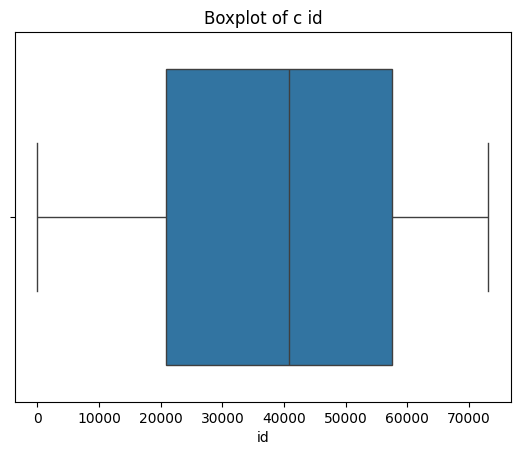

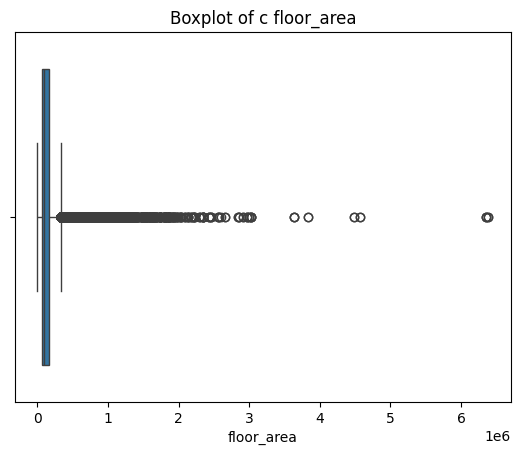

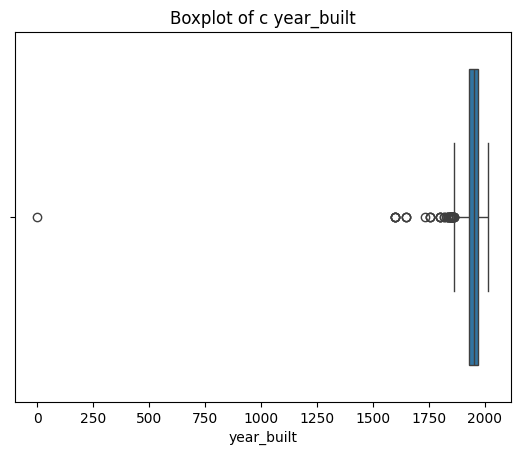

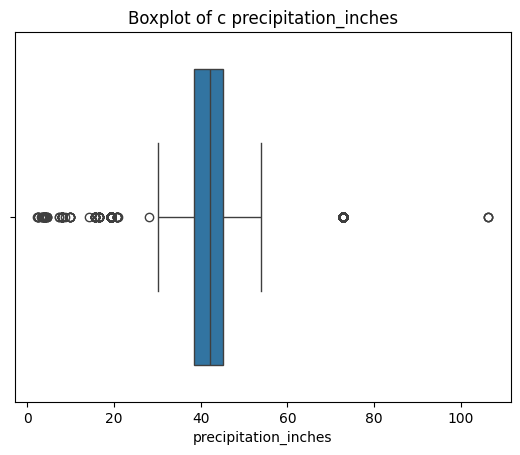

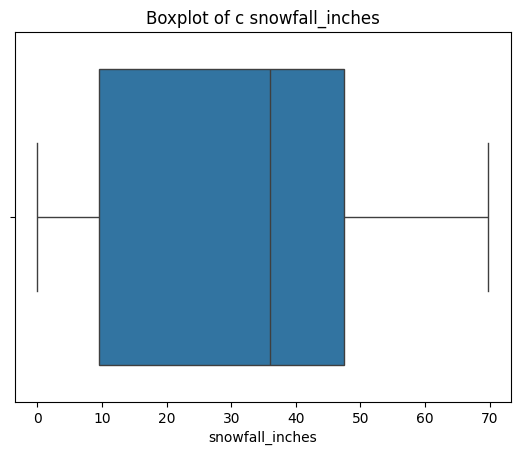

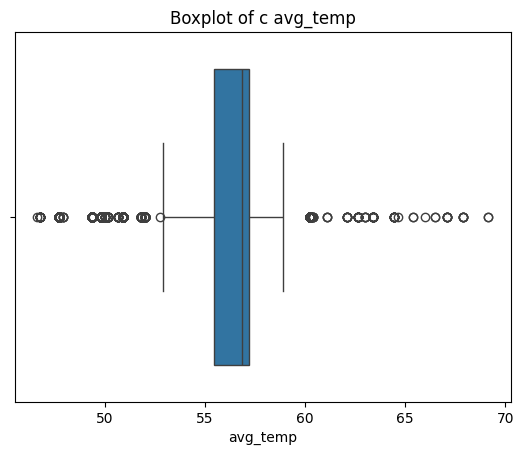

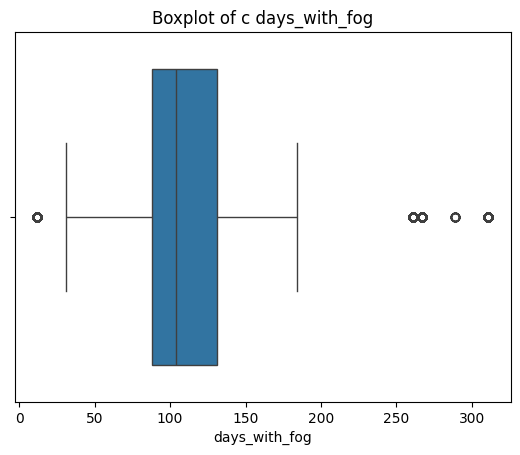

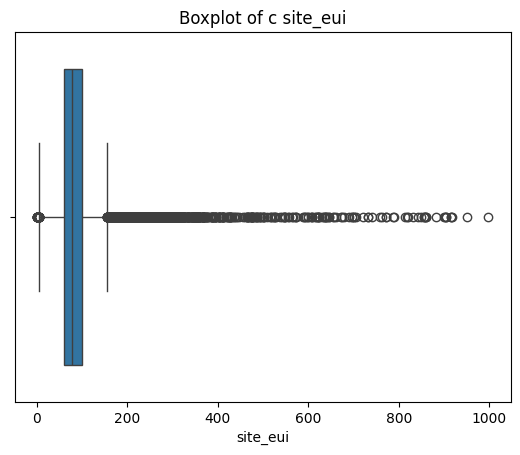

In [24]:
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of c {col}")
    plt.show()

The presence of outliers will impact the analysis. I believe I can not remove the outliers because they are important  for the data and statistical analysis. Therefore, I am going to transform the data using the square root method. This will make the data more symmetrical and reduce the influence of extreme values.

#### **8. Histogram Analysis for Distribution:**

- Question: Generate histograms for each variable to examine their distributions. Are there any noticeable patterns or outliers? How does the distribution shape affect your preprocessing steps?

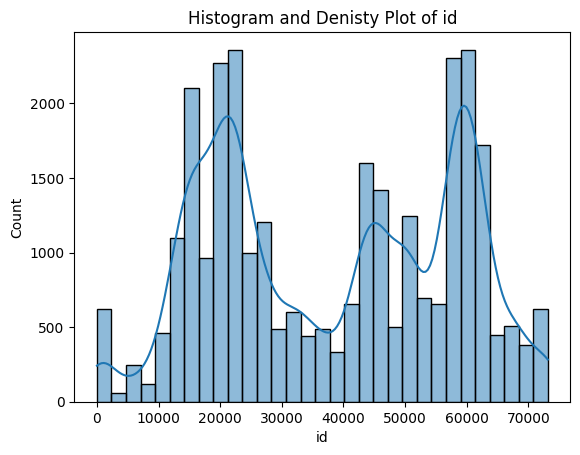

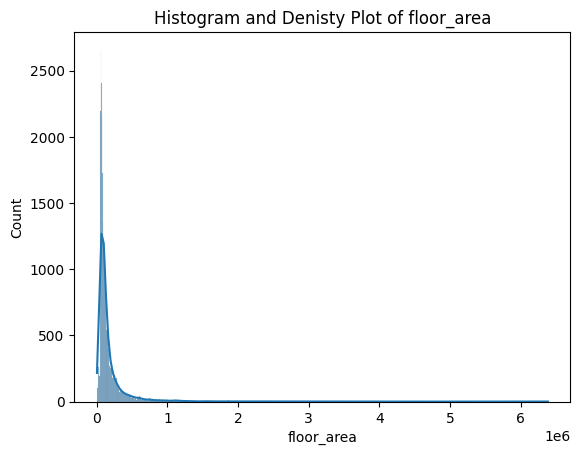

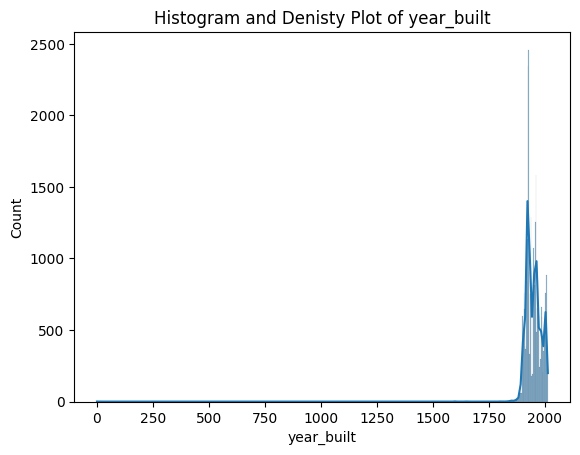

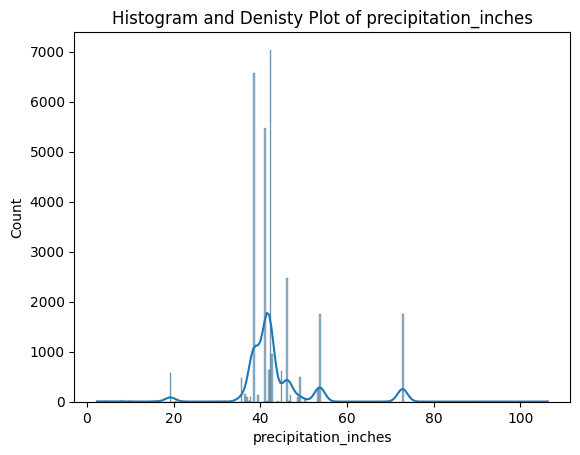

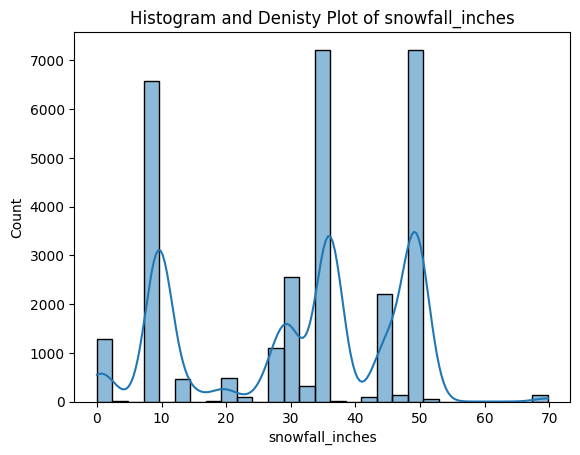

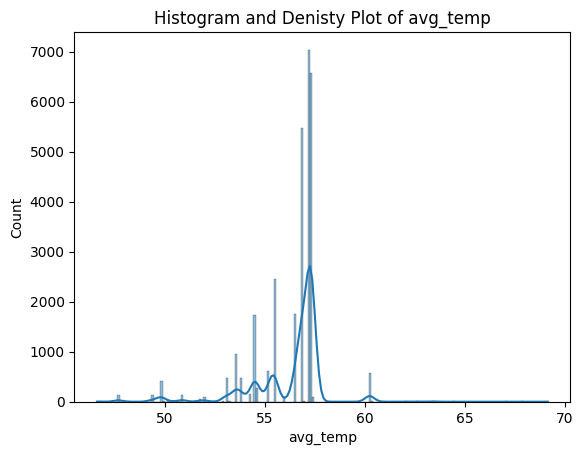

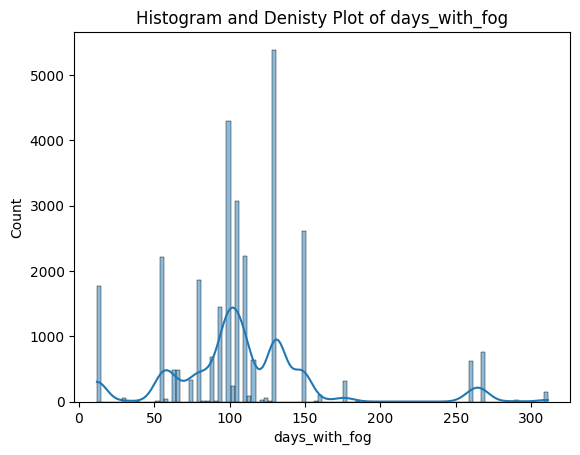

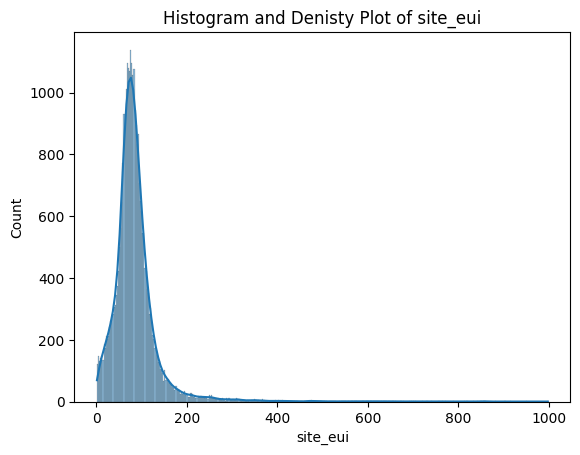

In [27]:
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram and Denisty Plot of {col}")
    plt.show()

Multiple of the varibles have outliers. Because of the outliers some of the varibles are higly skewed to one side and I belive they need to be normalized. 

#### **9. Feature Scaling:**

- Question: Do you need feature scaling in this dataset? Explain why?

I do think we need feature scaling because it would standardize the range of the variables.

#### **10. Outlier Detection with Z-score:**

- Question: Use the Z-score method to detect outliers in the dataset. How will you decide which outliers to handle and what strategies will you employ?

In [36]:
column_name = 'floor_area'
threshold = 3
mean = df[column_name].mean()
std_dev = df[column_name].std()
z_scores = (df[column_name] - mean) / std_dev
outliers = df[abs(z_scores) > threshold]
print("Outliers detected using Z-score method:")
print(outliers)

Outliers detected using Z-score method:
      building_class  floor_area  year_built  precipitation_inches  \
427       Commercial   1964250.0      1949.0                 19.27   
452       Commercial   1325000.0      1979.0                 19.27   
488       Commercial   1500000.0      1989.0                 19.27   
510       Commercial    937770.0      1990.0                 19.27   
546       Commercial   1978104.0      1969.0                 19.27   
...              ...         ...         ...                   ...   
68724    Residential   1195034.0      1964.0                 35.78   
68730    Residential   1179072.0      1959.0                 35.78   
72984     Commercial   1258280.0      1999.0                 45.03   
72987     Commercial   1172127.0      1999.0                 45.03   
73017     Commercial   1380959.0      1912.0                 45.03   

       snowfall_inches   avg_temp  days_with_fog  site_eui  
427                0.0  60.247268           88.0     65.14

In the variable years built there are some house that are made in year 0, which is not correct.There is also some other traits that is not correct and needs to be fixed. The strategy I will be emploing is Data Transformation.

#### **11. Range Analysis:**

- Question: Identify the maximum and minimum values for each variable. How do these ranges inform your preprocessing and analysis?

In [37]:
max_values = df.max()
min_values = df.min()
print("Maximum values:")
print(max_values)
print("\nMinimum values:")
print(min_values)

Maximum values:
building_class          Residential
floor_area                6385382.0
year_built                   2015.0
precipitation_inches         106.32
snowfall_inches                69.8
avg_temp                  69.157534
days_with_fog                 311.0
site_eui                     997.87
dtype: object

Minimum values:
building_class          Commercial
floor_area                  1800.0
year_built                     0.0
precipitation_inches          2.33
snowfall_inches                0.0
avg_temp                  46.61157
days_with_fog                 12.0
site_eui                       1.0
dtype: object


The range informs us on the distribution of the data and if there is any outliers. Because there is many outliers there needs to be solution since it will effect the analysis. 

#### **12. Encoding Categorical Variables:**

- Question: Encode the categorical variable. Which method do you find most suitable for your dataset and why?

In [41]:
building_class_mapping = {'Residential': 1, 'Commercial':2}
df.loc[:, 'building_class'] = df['building_class'].replace(building_class_mapping)
print(df)

       building_class  floor_area  year_built  precipitation_inches  \
1                   2    274000.0      1955.0                 16.59   
2                   2    280025.0      1951.0                 16.59   
3                   2     55325.0      1980.0                 16.59   
15                  2     90045.0      1949.0                 16.59   
16                  2     74055.0      1949.0                 16.59   
...               ...         ...         ...                   ...   
73151               1     87458.0      1966.0                 45.03   
73152               2    162157.0      2005.0                 45.03   
73153               2    187027.0      2014.0                 45.03   
73154               2     56988.0      2014.0                 45.03   
73155               2    126604.0      2015.0                 45.03   

       snowfall_inches   avg_temp  days_with_fog  site_eui  
1                  0.0  56.972603           12.0     26.50  
2                  0.0  5